Jumlah Sel Darah: 48


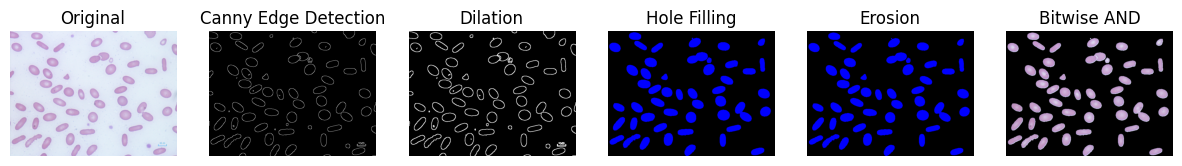

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

image = cv2.imread('Dataset/707.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (3, 3), 0)

edges = cv2.Canny(blurred, 70, 110)

kernel = np.ones((2, 2), np.uint8)
dil = cv2.dilate(edges, kernel, iterations=1)

contours,_=cv2.findContours(dil,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

filled = np.zeros_like(image)

count = 0
for contour in contours:
    area = cv2.contourArea(contour)
    if area >= 280:
        cv2.drawContours(filled, [contour], -1, 255, thickness=cv2.FILLED)
        count += 1
print(f"Jumlah Sel Darah: {count}")

eroded = cv2.erode(filled, kernel, iterations=1)

eroded_gray = cv2.cvtColor(eroded, cv2.COLOR_BGR2GRAY)

_, binary_eroded = cv2.threshold(eroded_gray, 1, 255, cv2.THRESH_BINARY)

bitwise = cv2.bitwise_and(image, image, mask=binary_eroded)

output_folder = 'output'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

cv2.imwrite(os.path.join(output_folder, 'original_image.jpg'), image)
cv2.imwrite(os.path.join(output_folder, 'edges.jpg'), edges)
cv2.imwrite(os.path.join(output_folder, 'dilated.jpg'), dil)
cv2.imwrite(os.path.join(output_folder, 'filled.jpg'), filled)
cv2.imwrite(os.path.join(output_folder, 'eroded.jpg'), eroded)
cv2.imwrite(os.path.join(output_folder, 'bitwiset.jpg'), bitwise)

plt.figure(figsize=(15, 8))

plt.subplot(1, 6, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')

plt.subplot(1, 6, 2)
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB), cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')

plt.subplot(1, 6, 3)
plt.imshow(cv2.cvtColor(dil, cv2.COLOR_BGR2RGB), cmap='gray')
plt.title("Dilation")
plt.axis('off')

plt.subplot(1, 6, 4)
plt.imshow(cv2.cvtColor(filled, cv2.COLOR_BGR2RGB))
plt.title("Hole Filling")
plt.axis('off')

plt.subplot(1, 6, 5)
plt.imshow(cv2.cvtColor(eroded, cv2.COLOR_BGR2RGB))
plt.title("Erosion")
plt.axis('off')

plt.subplot(1, 6, 6)
plt.imshow(cv2.cvtColor(bitwise, cv2.COLOR_BGR2RGB))
plt.title("Bitwise AND")
plt.axis('off')

plt.show()